# Table of Contents

* [CREDIT CARD CLASSIFICATION](#casestudy)
* [EDA](#eda)
* [CREATING NEW COLUMNS](#newcolumns)
* [MULTICOLLINEARITY](#multicollinearity)
* [DROPPING COLUMNS](#DroppingCol)
* [BINNING USING Q-CUTS](#qcut)
* [OUTLIERS](#outliers)
* [BOX PLOTS](#boxplots)
* [PRE-PROCESSING](#preprocessing)
* [SPLITTING DATA THE TRAIN/TEST](#ttsplit)
* [MACHINE LEARNING MODELS](#applymoded)
* [MODEL 1 : LOGISTIC REGRESSION](#M1)
* [MODEL 2 : RANDOMN FOREST CLASSIFIER](#M2)
* [MODEL 3 : GAUSSIAN NB](#M3)
* [**SMOTE**](#smote)
* [MODEL 1 : LOGISTIC REGRESSION](#SM1)
* [MODEL 2 : RANDOMN FOREST CLASSIFIER](#SM2)
* [MODEL 3 : GAUSSIAN NB](#SM3)
* [VALIDATION](#V)
* [CONCLUSION](#V)


## Case study classification project <a class="anchor" id="casestudy"></a>

In [7]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [8]:
df = pd.read_excel('creditcardmarketing.xlsx')

###  EDA - exploratory data analysis - get to know the data <a class="anchor" id="eda"></a>

**STANDARDISE THE COLUMNS**

In [9]:
# standerdize the readers: replace spaces by _, put in lowercase, remove #
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace('#_', '')


**FILL MISSING VALUES WITH MEAN VALUES**

We found few missing values (less than 20%). so we are not droping them.

Since the balances columns are float, we will fill them with the mean

In [10]:
# q1_balance
mean_q2_balance = df['q1_balance'].mean()
df['q1_balance'] = df['q1_balance'].fillna(mean_q2_balance)
df['q1_balance'] = pd.to_numeric(df['q1_balance'], errors = 'coerce')
#q2_balance
mean_q2_balance = df['q2_balance'].mean()
df['q2_balance'] = df['q2_balance'].fillna(mean_q2_balance)
df['q2_balance'] = pd.to_numeric(df['q2_balance'], errors = 'coerce')
#q3_balance
mean_q3_balance = df['q3_balance'].mean()
df['q3_balance'] = df['q3_balance'].fillna(mean_q3_balance)
df['q3_balance'] = pd.to_numeric(df['q3_balance'], errors = 'coerce')
#q4_balance
mean_q4_balance = df['q4_balance'].mean()
df['q4_balance'] = df['q4_balance'].fillna(mean_q4_balance)
df['q4_balance'] = pd.to_numeric(df['q4_balance'], errors = 'coerce')


### CREATING TWO NEW COLUMN <a class="anchor" id="newcolumns"></a>

In [11]:
# make a new column that gives the difference between q2 and q1
df['dif_q1_q2']= df['q2_balance']-df['q1_balance']
df['dif_q1_q2']

0        -792.0
1          67.0
2         -15.0
3         182.0
4        -783.0
          ...  
17995     -71.0
17996     -44.0
17997    -151.0
17998     357.0
17999    1113.0
Name: dif_q1_q2, Length: 18000, dtype: float64

In [12]:
# make a new column that gives the difference between q2 and q1
df['dif_q3_q4']= df['q4_balance']-df['q3_balance']
df['dif_q3_q4']

0         -93.0
1         288.0
2          97.0
3        -700.0
4        -617.0
          ...  
17995     327.0
17996    -408.0
17997     324.0
17998     750.0
17999   -1375.0
Name: dif_q3_q4, Length: 18000, dtype: float64

In [13]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance', 'dif_q1_q2', 'dif_q3_q4'],
      dtype='object')

In [14]:
df['household_size'].value_counts()

3    5712
4    5543
5    2853
2    2813
1     539
6     538
9       1
8       1
Name: household_size, dtype: int64

### MULTICOLLINEARITY  <a class="anchor" id="multicollinearity"></a>

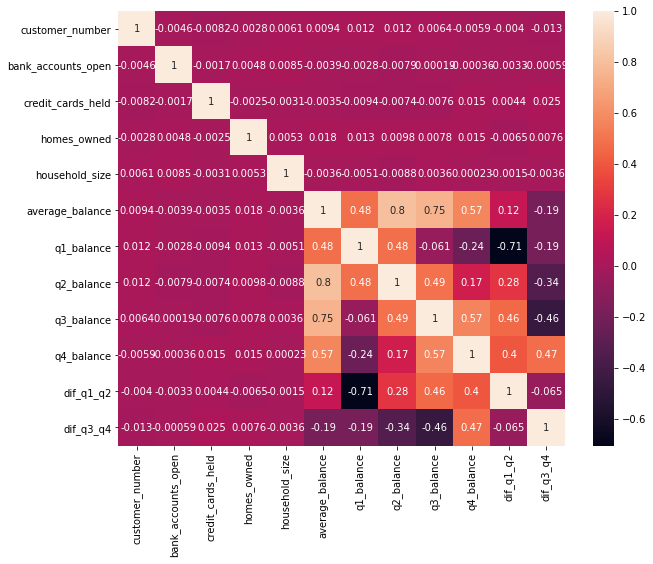

In [15]:
#check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

The graph proves the absence of multicollinearity. 

"The linear model makes the following assumptions
- Require a linear relationship between the dependent and independent variables.
- The error terms (residuals) need to be normally distributed. 
- If not weights can be introduced to penalize some observations in the error metric.
Independent variables are normally distributed.
If not (apply transformation Box-Cox)
- Absence of multicollinearity.
- Independent observations (not repeated)"

### DROPPING COLUMNS  <a class="anchor" id="DroppingCol"></a>

In [16]:
# Droppping the columns
df=df.drop(['customer_number','average_balance','q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'], axis=1)
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,dif_q1_q2,dif_q3_q4
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,-792.0,-93.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,67.0,288.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,-15.0,97.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,182.0,-700.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,-783.0,-617.0
5,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,-482.0,-253.0
6,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,-280.0,-215.0
7,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,259.0,21.0
8,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,-3.0,471.0
9,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,-360.0,-399.0


In [17]:
df.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'dif_q1_q2', 'dif_q3_q4'],
      dtype='object')

###  BINNING USING Q-CUT <a class="anchor" id="qcut"></a>

In [18]:
df = df.groupby(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open','overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'own_your_home',
       'dif_q1_q2', 'dif_q3_q4'])['household_size'].sum().reset_index()

In [19]:
# Binning syntax - q cut
df['household_size'] = pd.qcut(df['household_size'],duplicates='drop', q=4)

In [20]:
df['household_size'].value_counts()

(0.999, 3.0]    9064
(3.0, 4.0]      5543
(4.0, 9.0]      3393
Name: household_size, dtype: int64

In [21]:
df

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,own_your_home,dif_q1_q2,dif_q3_q4,household_size
0,No,Air Miles,Letter,High,1,No,High,1,1,No,-947.0,-527.0,"(4.0, 9.0]"
1,No,Air Miles,Letter,High,1,No,High,1,1,No,-758.0,-164.0,"(0.999, 3.0]"
2,No,Air Miles,Letter,High,1,No,High,1,1,No,-698.0,-1071.0,"(0.999, 3.0]"
3,No,Air Miles,Letter,High,1,No,High,1,1,No,-445.0,-358.0,"(4.0, 9.0]"
4,No,Air Miles,Letter,High,1,No,High,1,1,No,-407.0,-404.0,"(0.999, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Yes,Points,Postcard,Medium,2,No,Medium,3,1,Yes,603.0,-231.0,"(3.0, 4.0]"
17996,Yes,Points,Postcard,Medium,2,Yes,Low,1,2,Yes,40.0,98.0,"(0.999, 3.0]"
17997,Yes,Points,Postcard,Medium,2,Yes,Low,2,1,No,1355.0,-861.0,"(3.0, 4.0]"
17998,Yes,Points,Postcard,Medium,2,Yes,Low,2,1,Yes,414.0,416.0,"(4.0, 9.0]"


### OUTLIERS <a class="anchor" id="outliers"></a>

### BOX PLOTS - cleaned using IQRs<a class="anchor" id="boxplots"></a>
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In [22]:
# find quartiles and clean up outliers
cols_outliers = ['dif_q1_q2',
       'dif_q3_q4']

for col in cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('dif_q1_q2 of the column ', col,':', Q1)
    print('dif_q3_q4 of the column ', col,':', Q3)
    print('IRQ of the column ', col,':', IQR)
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    print('lower_whisker: ', Lower_Whisker, ',' , 'upper whisker: ', Upper_Whisker)
    #  Outlier Treatment 
    df = df[df[col]< Upper_Whisker]
    df = df[df[col]> Lower_Whisker]
    


dif_q1_q2 of the column  dif_q1_q2 : -300.0
dif_q3_q4 of the column  dif_q1_q2 : 410.0
IRQ of the column  dif_q1_q2 : 710.0
lower_whisker:  -1365.0 , upper whisker:  1475.0
dif_q1_q2 of the column  dif_q3_q4 : -556.0
dif_q3_q4 of the column  dif_q3_q4 : 105.0
IRQ of the column  dif_q3_q4 : 661.0
lower_whisker:  -1547.5 , upper whisker:  1096.5


**CHECK THE BOXPLOTS**

<AxesSubplot:>

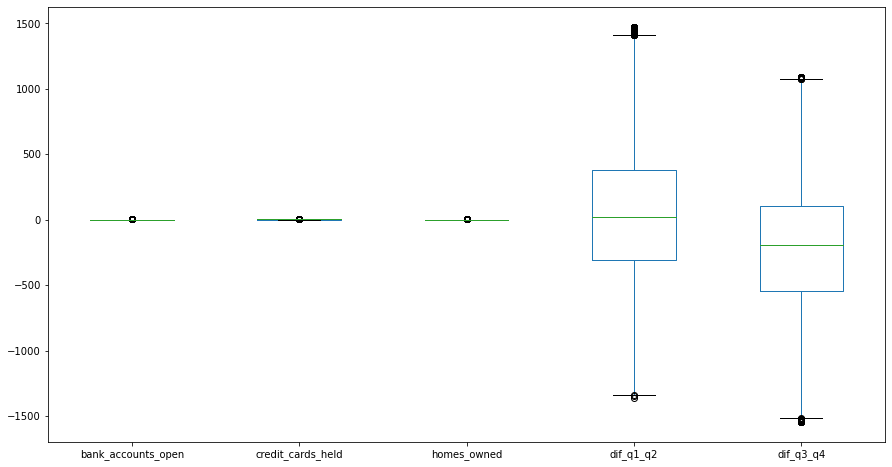

In [23]:
#check boxplots
df.boxplot(grid=False, figsize= (15,8))

**CHECK FOR MULTICOLLINEARITY**

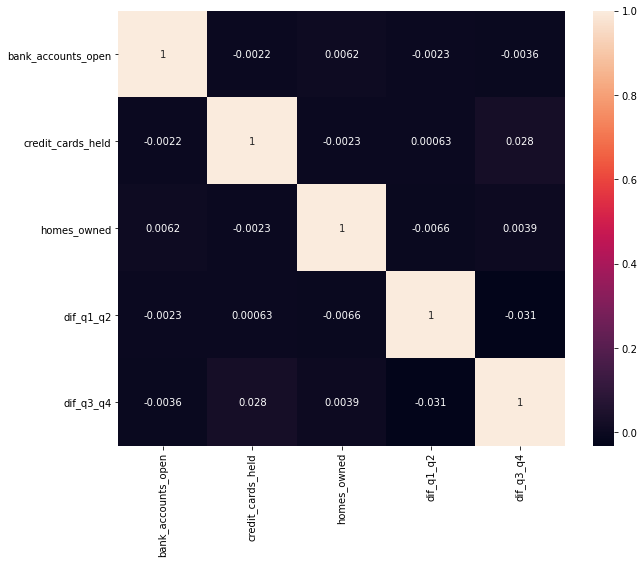

In [24]:
# # check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# q1, q2 ,q3 have collinearity

In [25]:
cat = df.select_dtypes(include = np.object)
cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,High,No,High,No
2,No,Air Miles,Letter,High,No,High,No
3,No,Air Miles,Letter,High,No,High,No
4,No,Air Miles,Letter,High,No,High,No
...,...,...,...,...,...,...,...
17995,Yes,Points,Postcard,Medium,No,Medium,Yes
17996,Yes,Points,Postcard,Medium,Yes,Low,Yes
17997,Yes,Points,Postcard,Medium,Yes,Low,No
17998,Yes,Points,Postcard,Medium,Yes,Low,Yes


### Numerical Columns

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

Kernel Density Estimation(KDE): Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data. Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.

In [26]:
numerics = ['int64', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num

,bank_accounts_open,credit_cards_held,homes_owned,dif_q1_q2,dif_q3_q4
0,1,1,1,-947.0,-527.0
1,1,1,1,-758.0,-164.0
2,1,1,1,-698.0,-1071.0
3,1,1,1,-445.0,-358.0
4,1,1,1,-407.0,-404.0
...,...,...,...,...,...
17995,2,3,1,603.0,-231.0
17996,2,1,2,40.0,98.0
17997,2,2,1,1355.0,-861.0
17998,2,2,1,414.0,416.0


###  Normal Distribution <a class="anchor" id="nd"></a>

array([[<AxesSubplot:title={'center':'dif_q1_q2'}>,
        <AxesSubplot:title={'center':'dif_q3_q4'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

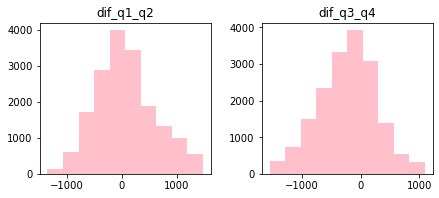

In [27]:
df[['dif_q1_q2', 'dif_q3_q4']].hist(figsize=(15,10),layout=(3,4), grid=False, color='pink')

### Categorical Columns <a class="anchor" id="catergoricalCol"></a>


In [28]:
# reset index
df = df.reset_index(drop = True)

In [29]:
cat = df.select_dtypes(exclude = ['float64'])
cat_col=cat.columns.to_list()
cat_col

['offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'own_your_home',
 'household_size']

In [63]:
categorical = pd.get_dummies(cat, columns =['reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'own_your_home',
 'household_size',
 'offer_accepted'],drop_first=True)
categorical.head()

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,bank_accounts_open_2,bank_accounts_open_3,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,credit_cards_held_2,credit_cards_held_3,credit_cards_held_4,homes_owned_2,homes_owned_3,own_your_home_Yes,"household_size_(3.0, 4.0]","household_size_(4.0, 9.0]",offer_accepted_Yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### PRE - PROCESSING<a class="anchor" id="preprocessing"></a>

**NUMERICAL**

In [31]:
# numerical scaling 
from sklearn.preprocessing import Normalizer

In [32]:
# df_num are the numerical
# using 'bank_accounts_open', 'credit_cards_held', 'homes_owned' as categorical columns
X = df_num.drop(['bank_accounts_open', 'credit_cards_held', 'homes_owned'], axis=1)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

In [33]:
X_normalised


,0,1
0,-0.873809,-0.486270
1,-0.977385,-0.211466
2,-0.546005,-0.837782
3,-0.779158,-0.626828
4,-0.709718,-0.704486
...,...,...
17522,0.933824,-0.357733
17523,0.377897,0.925848
17524,0.844020,-0.536311
17525,0.705401,0.708809


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

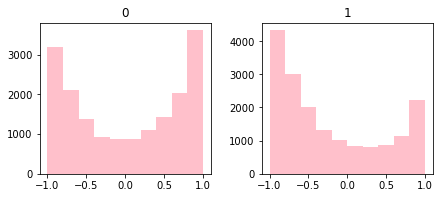

In [34]:
X_normalised.hist(figsize=(15,10),layout=(3,4), grid=False, color='pink')

### Split off the dependant variable (label) <a class="anchor" id="split"></a>

In [35]:
#sort out the categoricals 
y= categorical['offer_accepted_Yes']
categorical=categorical.drop(['offer_accepted_Yes'], axis=1)
#categorical

In [36]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((X, categorical),axis=1)



### TRAIN/ TEST SET <a class="anchor" id="ttsplit"></a>

**TRAINING THE TEST SET**

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

### Calling Library Functions

In [39]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
import math

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

### METHOD 1 : LOGISTIC REGRESSION <a class="anchor" id="M1"></a>

### Evaluate accuracy and test <a class="anchor" id="evaluate"></a>

Logistic Regression:
The accuracy of the model on test set is:  0.9442304949365283
Kappa:  0.0
ROC-AUC score:  0.5
F1 score:  0.0
Confusion Matrix - raw:


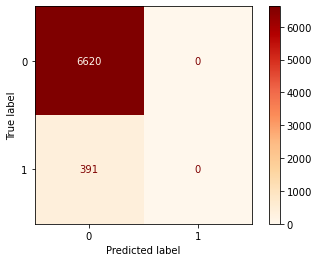

Confusion Matrix - normalised row-wise:


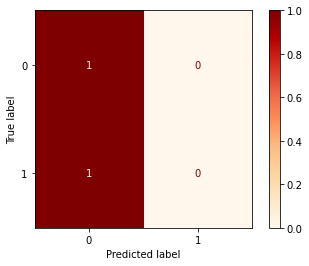

[LogisticRegression(), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)
print ("Logistic Regression:")
predictions = model.predict(X_test)

#calculate scores.
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))

#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "OrRd")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "OrRd")
plt.show() 
[model, predictions]

**VISUALISING** 

In [41]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

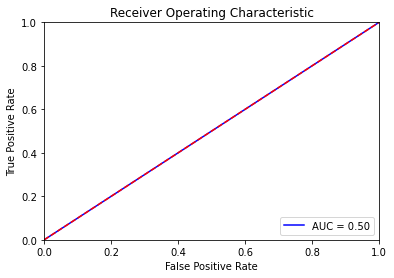

In [42]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION**

The dataset is highly imbalanced

### Model 2 : RandomForestClassifier <a class="anchor" id="M2"></a>

Random Forest:
The accuracy of the model on test set is:  0.9429467978890316
Kappa:  0.006334599213826508
ROC-AUC score:  0.5017267290470635
F1 score:  0.009900990099009901
Confusion Matrix - raw:


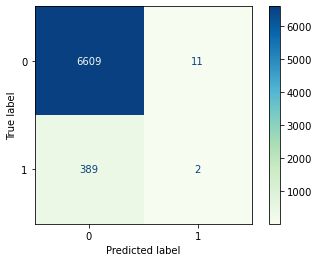

Confusion Matrix - normalised row-wise:


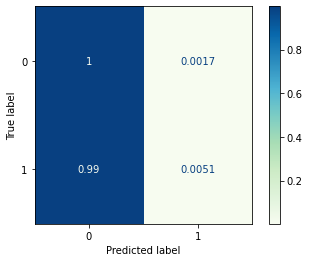

[RandomForestClassifier(), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [43]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print ("Random Forest:")
predictions = model.predict(X_test)

#calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
plt.show() 
[model, predictions]

**VISUALISING** 

In [44]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

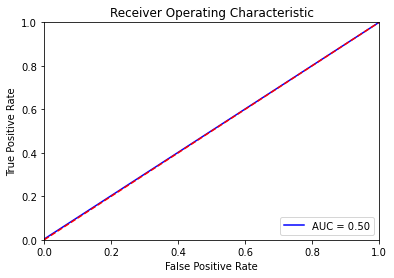

In [45]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model 3: GaussianNB <a class="anchor" id="M3"></a>

Gaussian NB:
The accuracy of the model on test set is:  0.9333903865354443
Kappa:  0.10008583733454046
ROC-AUC score:  0.5351701037698673
F1 score:  0.12710280373831775
Confusion Matrix - raw:


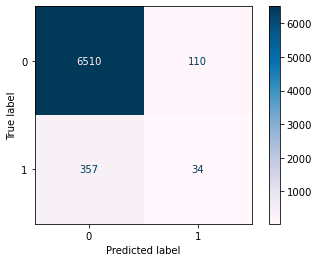

Confusion Matrix - normalised row-wise:


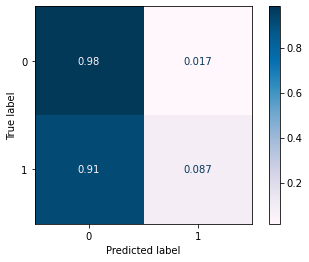

In [46]:
model = GaussianNB()
model.fit(X_train, y_train)
print ("Gaussian NB:")
predictions = model.predict(X_test)

#calculate scores. 
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "PuBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "PuBu")
plt.show() 

In [47]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

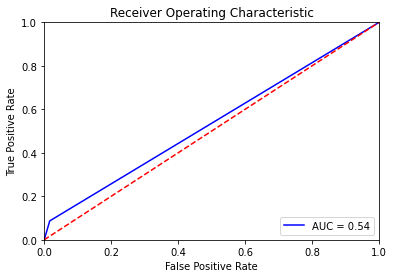

In [48]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SOLVING THE IMBALANCE WITH SMOTE <a class="anchor" id="smote"></a>

**SMOTE - oversample the minority class of the target label**

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE()

In [51]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    16529
0    16529
Name: offer_accepted_Yes, dtype: int64

**TRAINING THE DATASET**

In [52]:
#re do train test split It2
X_train, X_test, y_train, y_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

# After SMOTE 

### Model 1: Logistic Regression<a class="anchor" id="SM1"></a>

Logistic Regression:
The accuracy of the model on test set is:  0.7123411978221416
Kappa:  0.42431665599660195
ROC-AUC score:  0.7120382123337026
F1 score:  0.7240278583865352
Confusion Matrix - raw:


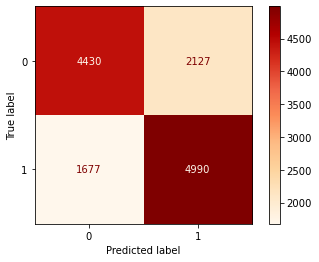

Confusion Matrix - normalised row-wise:


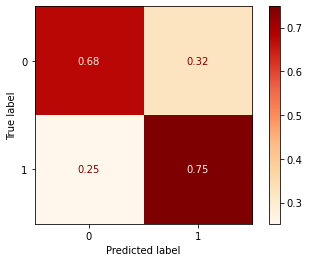

[LogisticRegression(), array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)]

In [53]:
# apply logistic Regression 
model = LogisticRegression()
model.fit(X_train, y_train)
print ("Logistic Regression:")
predictions = model.predict(X_test)

#calculate scores.
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))

#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "OrRd")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "OrRd")
plt.show() 
[model, predictions]

**VISUALISING**

In [54]:
# calculate the Auc
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

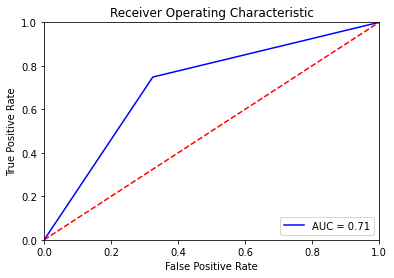

In [55]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION**

The Model imporved at predicting but the acuracy dropped to 71.23 %

### Model 2 : RandomForestClassifier <a class="anchor" id="SM2"></a>

Random Forest:
The accuracy of the model on test set is:  0.969147005444646
Kappa:  0.9383165926782507
ROC-AUC score:  0.9693625277558754
F1 score:  0.9685863874345549
Confusion Matrix - raw:


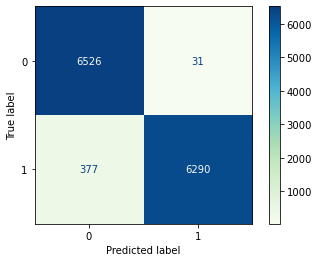

Confusion Matrix - normalised row-wise:


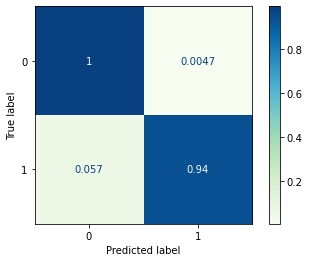

In [56]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print ("Random Forest:")
predictions = model.predict(X_test)

#calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "GnBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu")
plt.show() 

In [57]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)


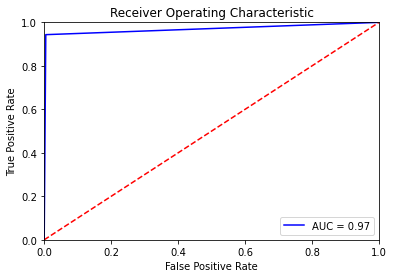

In [58]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**CONCLUSION**

The model has a ver good prediction as well as very good acuracy 96.88 %

### MODEL 3 : GaussianNB()<a class="anchor" id="SM3"></a>

Gaussian NB:
The accuracy of the model on test set is:  0.7367664851784634
Kappa:  0.4727343268138484
ROC-AUC score:  0.7360254718696122
F1 score:  0.7596492439411725
Confusion Matrix - raw:


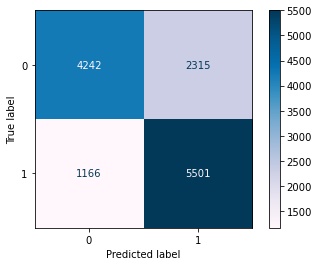

Confusion Matrix - normalised row-wise:


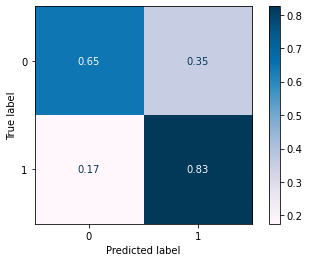

In [59]:
model = GaussianNB()
model.fit(X_train, y_train)
print ("Gaussian NB:")
predictions = model.predict(X_test)

#calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
print("Kappa: ", cohen_kappa_score(y_test, predictions))   
print("ROC-AUC score: ", roc_auc_score(y_test, predictions)) 
print("F1 score: ", f1_score(y_test, predictions))  
#generate confusion matrices with raw and normalised values
print ("Confusion Matrix - raw:")
plot_confusion_matrix(model, X_test, y_test, cmap = "PuBu")
plt.show() 
print ("Confusion Matrix - normalised row-wise:")
plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "PuBu")
plt.show() 

In [60]:
# calculate the AOC
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

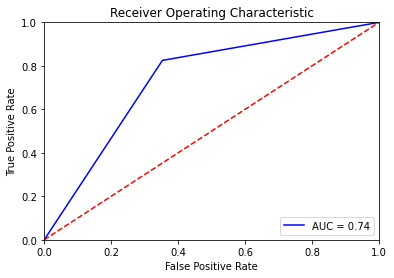

In [61]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION** <a class="anchor" id="V"></a>

The model got better at prediction but a drop in acuracy 72.36 % but better than the Regression Model

**VALIDATION** : Comparing the Models acuracy, AOC , F1 score, Kappa

    
|Qualification               | Acuracy    | AOC/RUC | F1-Score| kappa |
| -----------                | -----------| --------| --------| ----- |
| Logistic regression        | 74.9 %     |  50 %   |   0     | 0     |
| Randomn Forest Classifier  | 94.24 %    |  50 %   |   14.6% | 1 %   |
| Gaussian NB                | 93.34 %    |  53.5 % |   12.7% | 10%   |
| **After SMOTE**            |            |         |         |       |
| Logistic regression        | 71.13 %    |  71.1 % |  72.59% | 42.2% |
| Randomn Forest Classifier  | 96.88 %    |  96.9 % |  96.82% | 93.77%|
| Gaussian NB                | 74.36 %    |  74.3 % |  76.46% | 48.66%|


**CONCLUSION**

The Randomn Forest Classifier has the best acuracy and the model will be good in prediction since it has high AUC, F1 and Kappa score 